In [ ]:
import sys
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install salesforce-lavis

In [1]:
!pip3 install salesforce-lavis

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 102.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.0.dev0
    Uninstalling transformers-4.41.0.dev0:
      Successfully uninstalled transformers-4.41.0.dev0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import torch
from PIL import Image
import requests
from lavis.models import load_model_and_preprocess

In [ ]:

username='robinvegoblin@gmail.com'
password='Dp=qck_5#kaitqQ'


# SHAPY
!wget --post-data "username=$username&password=$password" 'https://download.is.tue.mpg.de/download.php?domain=shapy&resume=1&sfile=HBW_low_resolution.zip' -O 'hbw_data.zip' --no-check-certificate --continue
!unzip hbw_data.zip
!rm hbw_data.zip

In [ ]:
!cd HBW_low_resolution
!ls

In [ ]:
!ls

#### Load an example image

In [ ]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/LAVIS/assets/merlion.png'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
display(raw_image.resize((596, 437)))

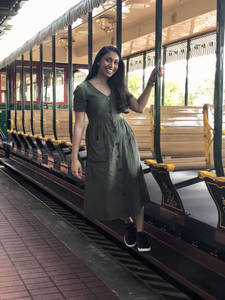

In [2]:
from PIL import Image
iamge = 'HBW_low_resolution/images/val_small_resolution/027_73_23/Pictures_in_the_Wild/02067.png'
display(Image.open(iamge))

In [3]:
import torch
# setup device to use
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
print(device)

cuda


#### Load pretrained/finetuned BLIP2 captioning model

In [ ]:
# prompt: code for mounting my drive

from google.colab import drive
drive.mount('/content/drive/')


In [ ]:
filee = '/content/drive/MyDrive/hubx/HBW_low_resolution.zip'
dest = '/content/drive/MyDrive/hubx'

!unzip -q -n $filee -d $dest

In [6]:
import os
import random

def find_images(base_path):
  """
  Recursively searches for folders containing PNG images under the given base path.

  Args:
      base_path: The base path to start searching from.

  Returns:
      A list of lists, where each inner list contains three randomly chosen PNG image paths
      found within the base path and its subfolders.
  """
  image_paths = []
  for root, _, files in os.walk(base_path):
    png_files = [os.path.join(root, f) for f in files if f.lower().endswith(".png")]
    if png_files:
      # If PNG files are found, randomly select 3 and add them to the list
      image_paths.append(random.sample(png_files, 1))
    else:
      # If no PNG files, check subfolders recursively
      for subdir in os.listdir(root):
        subfolder_path = os.path.join(root, subdir)
        if os.path.isdir(subfolder_path):
          image_paths.extend(find_images(subfolder_path))
  return image_paths

base = 'HBW_low_resolution/images/test_small_resolution'
path_list = find_images(base)

In [5]:
print(path_list[0])
print(len(path_list))
count = 0
for i in path_list:
    
    count += len(i)

print(count)

NameError: name 'path_list' is not defined

In [ ]:
!jupyter --data-dir


In [ ]:
!cd /home/umut_aydin/.local/share/jupyter
!ls

In [9]:
# we associate a model with its preprocessors to make it easier for inference.
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_t5", model_type="pretrain_flant5xxl", is_eval=True, device=device
# )

# Other available models:
#
model, vis_processors, _ = load_model_and_preprocess(
    name="blip2_opt", model_type="pretrain_opt2.7b", is_eval=True, device=device
)
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="pretrain_opt6.7b", is_eval=True, device=device
# )
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="caption_coco_opt2.7b", is_eval=True, device=device
# )
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="caption_coco_opt6.7b", is_eval=True, device=device
# )
#
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_t5", model_type="pretrain_flant5xl", is_eval=True, device=device
# )
#
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_t5", model_type="caption_coco_flant5xl", is_eval=True, device=device
# )

vis_processors.keys()

/opt/conda/envs/blip2/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

100%|██████████| 1.89G/1.89G [00:52<00:00, 38.7MB/s]


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/691 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/5.30G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

100%|██████████| 409M/409M [00:15<00:00, 28.2MB/s] 


dict_keys(['train', 'eval'])

In [ ]:
!pip3 uninstall -y transformers 

In [ ]:
!pip3 install git+https://github.com/huggingface/transformers.git@main

In [ ]:
import transformers
print(transformers.__version__)

In [ ]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
# by default `from_pretrained` loads the weights in float32
# we load in float16 instead to save memory
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16) 

#### prepare the image as model input using the associated processors

In [18]:
prompts = [
    "Question: Is this person overweight? Answer:",
    "Question: Is this person skinny? Answer:",
    "Question: Does this person have an apple shaped body? Answer:",
    "Question: Does this person have a triangle shaped body? Answer:",
    "Question: Does this person have a rectangle shaped body? Answer:",
    "Question: Does this person have a hourglass shaped body? Answer:",
    "Question: Is this person tall? Answer:",
    "Question: Is this person short? Answer:",
    "Question: Is this person muscular? Answer:",
    "Question: Does this person have slim waist? Answer:",
    "Question: Does this person have large breasts? Answer:"
]

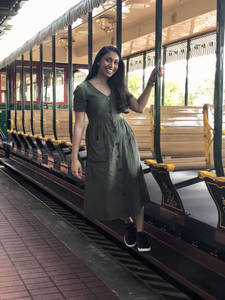

Question: Is this person overweight? Answer: no


In [16]:
from PIL import Image
# import warnings
# warnings.filterwarnings('ignore')

display(Image.open('HBW_low_resolution/images/val_small_resolution/027_73_23/Pictures_in_the_Wild/02067.png'))
image = vis_processors["eval"](Image.open('HBW_low_resolution/images/val_small_resolution/027_73_23/Pictures_in_the_Wild/02067.png')).unsqueeze(0).to(device)
#display(image)
# model = model.to(device)
prompt = "Question: Is this person overweight? Answer:"
output = model.generate({"image": image, "prompt": prompt})
# inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)
# generated_ids = model.generate(**inputs, max_new_tokens=10)
# generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(prompt + " " + output[0])

In [28]:
arr = []
for i in range(len(prompts)):
    arr.append([[],[],[]])


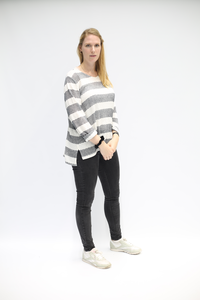

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


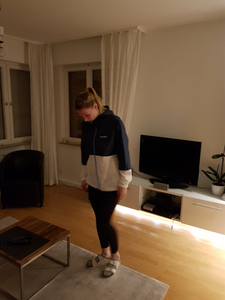

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


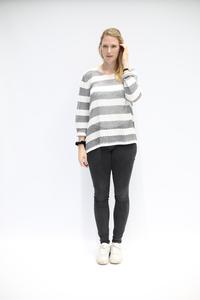

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


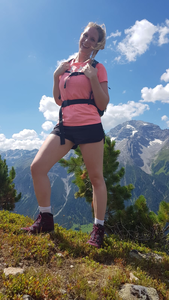

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


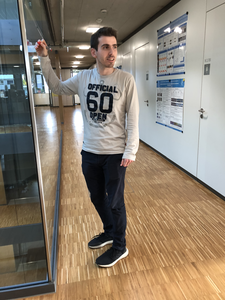

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


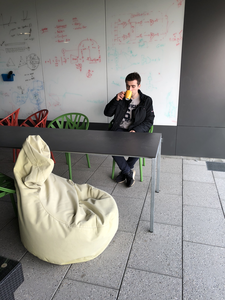

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: No
Question: Does this person have an apple shaped body? Answer: No
Question: Does this person have a triangle shaped body? Answer: No
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: No
Question: Is this person short? Answer: No
Question: Is this person muscular? Answer: No
Question: Does this person have slim waist? Answer: No
Question: Does this person have large breasts? Answer: No


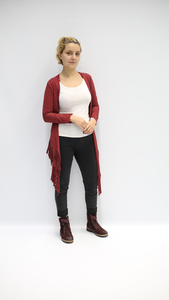

Question: Is this person overweight? Answer: No. Question: Is this person overweight? Answer: No. Question: Is this person overweight? Answer: No. Question: Is this person overweight
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes. Question: Is this person muscular? Answer: Yes. Question: Is this person muscular? Answer: Yes. Question: Is this person muscular
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


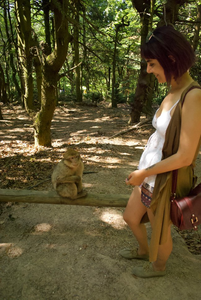

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes, she is
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


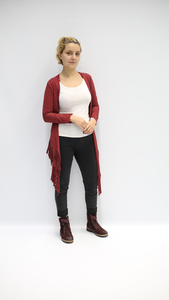

Question: Is this person overweight? Answer: No. Question: Is this person overweight? Answer: No. Question: Is this person overweight? Answer: No. Question: Is this person overweight
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes. Question: Is this person muscular? Answer: Yes. Question: Is this person muscular? Answer: Yes. Question: Is this person muscular
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


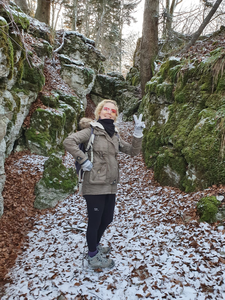

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: No, she's just happy
Question: Does this person have an apple shaped body? Answer: Yes, she does.
Question: Does this person have a triangle shaped body? Answer: Yes, she does.
Question: Does this person have a rectangle shaped body? Answer: No, she has a square shaped body
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: No, she is tall
Question: Is this person muscular? Answer: No, she is not muscular, she is not muscular, she is not muscular, she is not muscular, she is not muscular, she is not
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


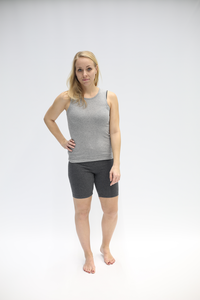

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


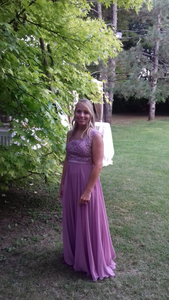

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


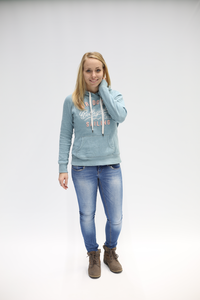

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


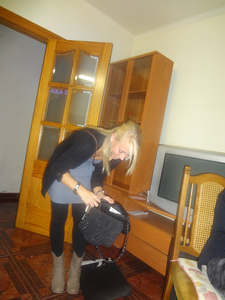

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: No
Question: Does this person have an apple shaped body? Answer: No
Question: Does this person have a triangle shaped body? Answer: No
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: No
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: No
Question: Is this person muscular? Answer: No
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


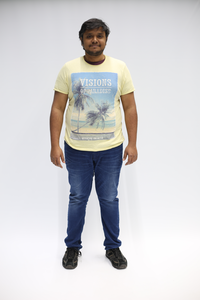

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: No
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


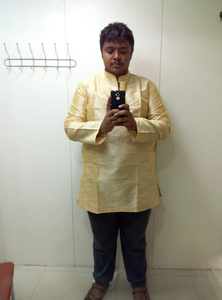

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


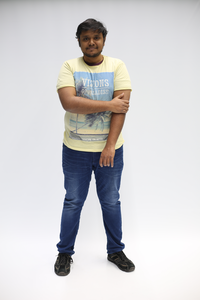

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: no
Question: Is this person muscular? Answer: No
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: yes


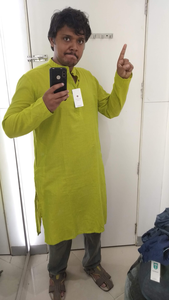

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


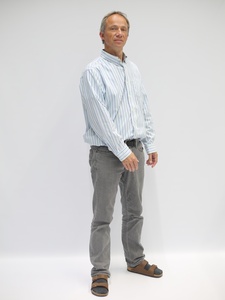

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: No
Question: Does this person have an apple shaped body? Answer: No
Question: Does this person have a triangle shaped body? Answer: No
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: No
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: No


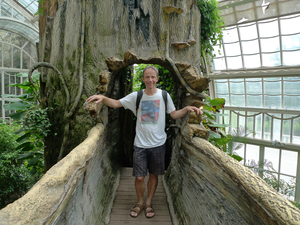

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: No
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


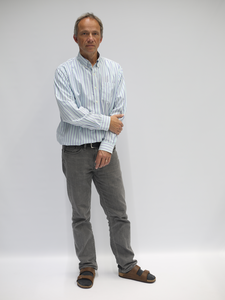

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: Yes


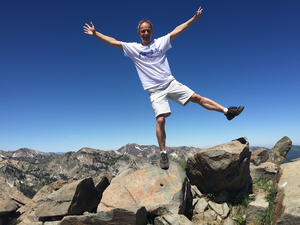

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


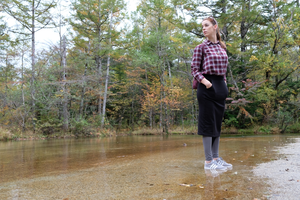

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: Yes


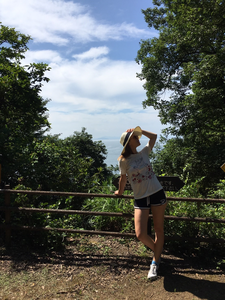

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


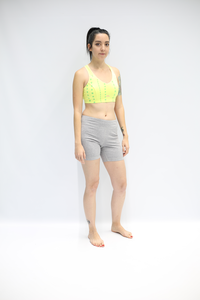

Question: Is this person overweight? Answer: No. Question: Is this person overweight? Answer: No. Question: Is this person overweight? Answer: No. Question: Is this person overweight
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


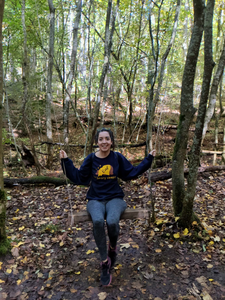

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


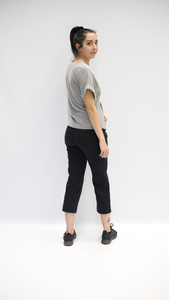

Question: Is this person overweight? Answer: No. Question: Is this person overweight? Answer: No. Question: Is this person overweight? Answer: No. Question: Is this person overweight
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


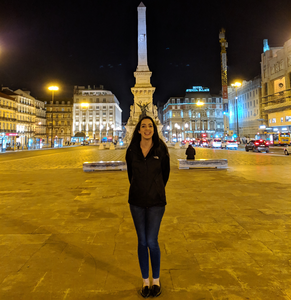

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


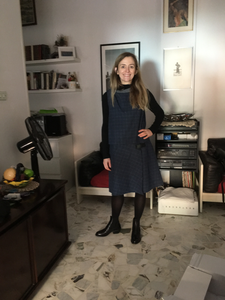

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


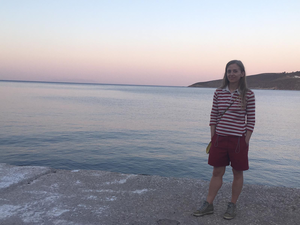

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: Yes


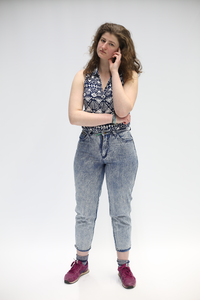

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: No
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: No
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


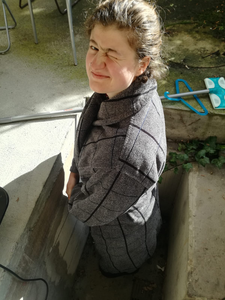

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: No
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: No
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


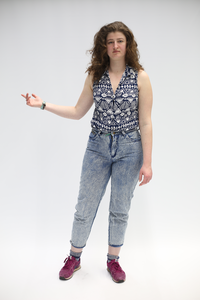

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: No
Question: Does this person have a triangle shaped body? Answer: No
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: No
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: No


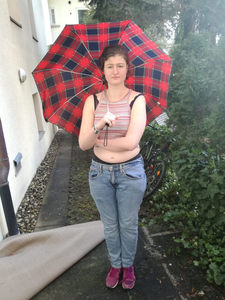

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: no
Question: Does this person have a triangle shaped body? Answer: no
Question: Does this person have a rectangle shaped body? Answer: no
Question: Does this person have a hourglass shaped body? Answer: no
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


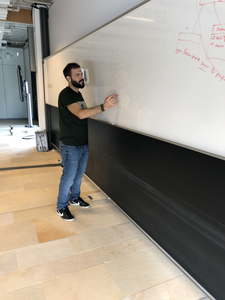

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


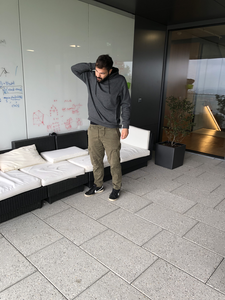

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


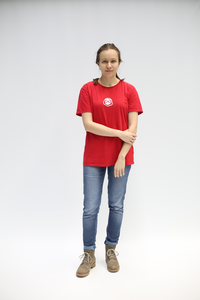

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


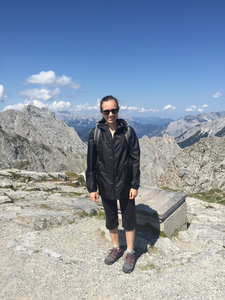

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


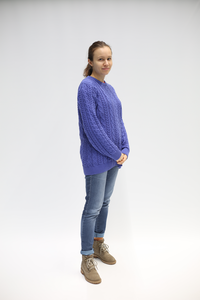

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: No
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


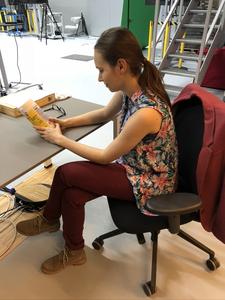

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


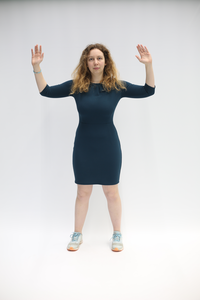

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: No
Question: Is this person muscular? Answer: No
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: No


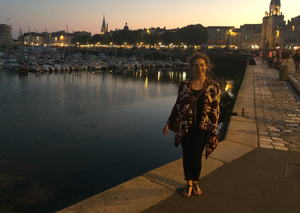

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


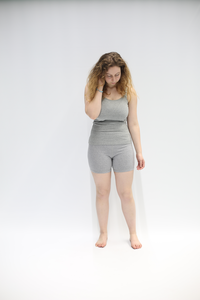

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


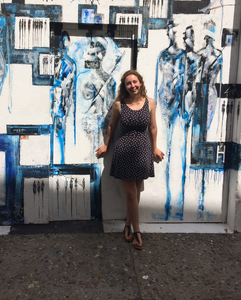

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


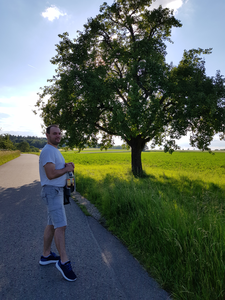

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: No
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: No
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


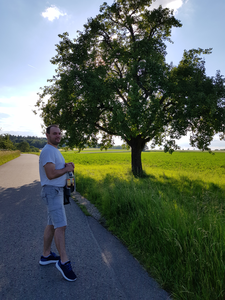

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: No
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: No
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


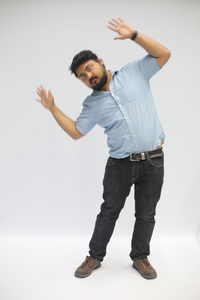

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: No
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: No


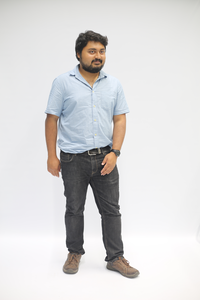

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: No
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: No
Question: Is this person muscular? Answer: No
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: No


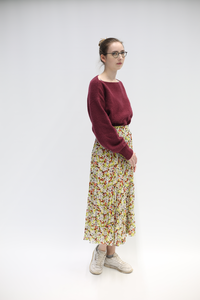

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: Yes


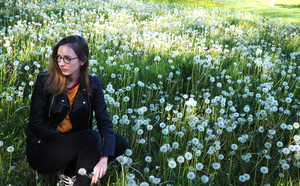

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: No, she's a dandelion
Question: Does this person have an apple shaped body? Answer: No, she has a dandelion shaped body
Question: Does this person have a triangle shaped body? Answer: Yes, she does
Question: Does this person have a rectangle shaped body? Answer: No, this person has a square shaped body
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: No, she's just sitting in a field of dandelions
Question: Is this person muscular? Answer: No
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: Yes


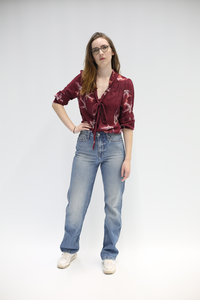

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: yes


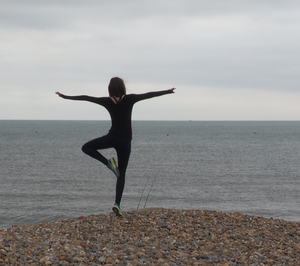

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


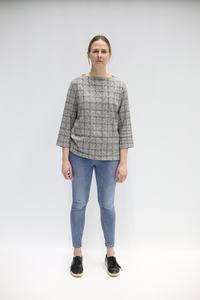

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


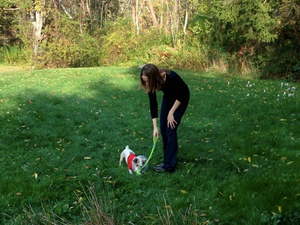

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: No
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: No, she's just tall
Question: Is this person muscular? Answer: No, this person is not muscular, this person is not muscular, this person is not muscular, this person is not muscular, this person is not
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


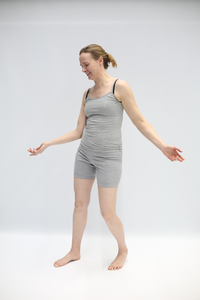

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: no


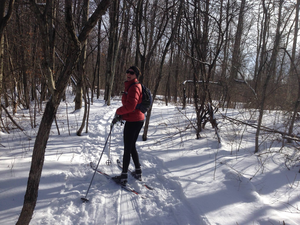

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: No
Question: Does this person have an apple shaped body? Answer: No
Question: Does this person have a triangle shaped body? Answer: No
Question: Does this person have a rectangle shaped body? Answer: No
Question: Does this person have a hourglass shaped body? Answer: No
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: No
Question: Does this person have slim waist? Answer: No
Question: Does this person have large breasts? Answer: No


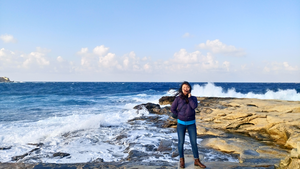

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


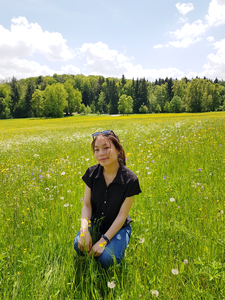

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: No
Question: Does this person have an apple shaped body? Answer: No
Question: Does this person have a triangle shaped body? Answer: No
Question: Does this person have a rectangle shaped body? Answer: No
Question: Does this person have a hourglass shaped body? Answer: No
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: No
Question: Is this person muscular? Answer: No
Question: Does this person have slim waist? Answer: No
Question: Does this person have large breasts? Answer: No


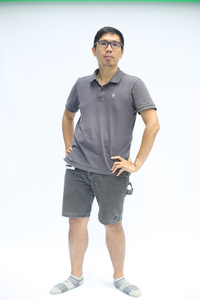

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: yes
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


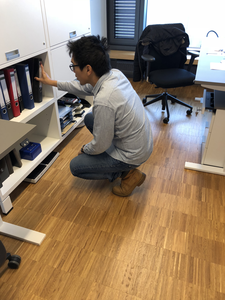

Question: Is this person overweight? Answer: No
Question: Is this person skinny? Answer: Yes
Question: Does this person have an apple shaped body? Answer: Yes
Question: Does this person have a triangle shaped body? Answer: Yes
Question: Does this person have a rectangle shaped body? Answer: Yes
Question: Does this person have a hourglass shaped body? Answer: Yes
Question: Is this person tall? Answer: Yes
Question: Is this person short? Answer: Yes
Question: Is this person muscular? Answer: Yes
Question: Does this person have slim waist? Answer: Yes
Question: Does this person have large breasts? Answer: Yes


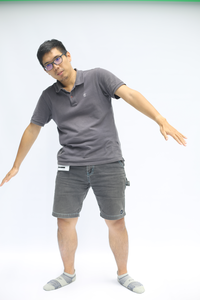

Question: Is this person overweight? Answer: no
Question: Is this person skinny? Answer: no
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes
Question: Is this person short? Answer: no
Question: Is this person muscular? Answer: yes
Question: Does this person have slim waist? Answer: yes
Question: Does this person have large breasts? Answer: yes


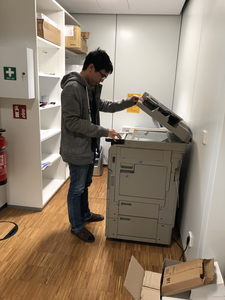

Question: Is this person overweight? Answer: yes
Question: Is this person skinny? Answer: yes
Question: Does this person have an apple shaped body? Answer: yes
Question: Does this person have a triangle shaped body? Answer: yes
Question: Does this person have a rectangle shaped body? Answer: yes
Question: Does this person have a hourglass shaped body? Answer: yes
Question: Is this person tall? Answer: yes


In [30]:

for i in path_list:
    for j in i:
     
        image = vis_processors["eval"](Image.open(j)).unsqueeze(0).to(device)
        display(Image.open(j))
        for i in range(len(prompts)):
            # inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)
            # generated_ids = model.generate(**inputs, max_new_tokens=10)
            # generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
            # print(prompt + " " + generated_text)
            output = model.generate({"image": image, "prompt": prompts[i]})
            print(prompts[i] + " " + output[0])

            if output[0] == 'yes' or 'Yes':

                arr[i][0].append(1)
            elif output[0] == 'no' or 'No':
                arr[i][1].append(1)

            else:
                arr[i][2].append(1)



In [1]:
print(arr)

NameError: name 'arr' is not defined

In [ ]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

#### generate caption using beam search

In [ ]:
model.generate({"image": image})

#### generate multiple captions using nucleus sampling

In [ ]:
# due to the non-determinstic nature of necleus sampling, you may get different captions.
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

#### instructed zero-shot vision-to-language generation

In [ ]:
model.generate({"image": image, "prompt": "Question: which city is this? Answer:"})

In [ ]:
model.generate({
    "image": image,
    "prompt": "Question: which city is this? Answer: singapore. Question: why?"})

In [ ]:
context = [
    ("which city is this?", "singapore"),
    ("why?", "it has a statue of a merlion"),
]
question = "where is the name merlion coming from?"
template = "Question: {} Answer: {}."

prompt = " ".join([template.format(context[i][0], context[i][1]) for i in range(len(context))]) + " Question: " + question + " Answer:"

print(prompt)

In [ ]:
model.generate(
    {
    "image": image,
    "prompt": prompt
    },
    use_nucleus_sampling=False,
)